## COMPILED DATASETS FOR VEHICLE FUEL EMISSIONS ANALYSIS

This notebook compiles publicly available datasets used for analyzing emissions from passenger electric vehicles (EVs)  and internal combustion engine (ICE) vehicles.

## IMPORTS

In [118]:
import numpy as np
import pandas as pd
import path
import matplotlib.pyplot as plt

In [119]:
# Included to support accessing the variables and dataframes in this notebook from another notebook
import os
from datetime import datetime, timedelta

In [120]:
# Included to ignore any warning dialoge generated
import warnings
warnings.filterwarnings('ignore')

In [121]:
# Added to show all columns in df display
pd.options.display.max_columns = None 

## ICE VEHICLE DATA

**ICE DATASET 1 (Placeholder): Hold for ICE Historic and Projected Sales Data** \
_Need non-EV sales data\
Documentation available here: TBD_

In [141]:
# # Reads the ICE sales data
# ICE_sales = pd.read_csv("Resources/Sales-file-name.csv")

# # Display the first 5 rows
# ICE_sales.head(10)

**ICE DATASET 2: Fuel Efficiency Standards by Year (1975-2031)** \
_Corporate Average Fuel Economy (CAFE) standards in miles per gallon (mpg) provided by National Highway Traffic Safety Administration
and  US EPA \
Documentation available at: https://afdc.energy.gov/data/10562_

In [143]:
# Reads the CSV file, skipping the first 3 rows and using the 4th row as header
vehicle_emission_standards = pd.read_csv("Resources/vehicle_efficiency_CAFE_requirements.csv")

# Display the first 5 rows
vehicle_emission_standards.fillna(0,inplace=True)

# Display the first 5 rows
vehicle_emission_standards.head(5)

,Model Year,Passenger Cars,Light-Duty Trucks
0,1978,18.0,0.0
1,1979,19.0,0.0
2,1980,20.0,0.0
3,1981,22.0,0.0
4,1982,24.0,17.5


**ICE DATASET 3: Estimated Real-World Fuel Economy, CO2 Emissions and Vehicle Attributes** \
_2023 EPA Automotive Trends Report data in US from 2010 to 2023\
Provides data for supporting fuel efficency predictions above minimum standards and beyond 2031 \
Documentation available here: https://www.epa.gov/automotive-trends/about-automotive-trends-data_

In [122]:
# Reads the CSV file, skipping the first 3 rows and using the 4th row as header
real_world_emissions = pd.read_csv("Resources/estimated_real_world_fuel_economy (1975 to 2022).csv")

# Replaces missing values with 0
real_world_emissions.fillna(0,inplace=True)

# Display the first 5 rows
real_world_emissions.head(10)

,Model Year,Regulatory Class,Vehicle Type,Production Share,Real-World MPG,Real-World MPG_City,Real-World MPG_Hwy,Real-World CO2 (g/mi),Real-World CO2_City (g/mi),Real-World CO2_Hwy (g/mi),Weight (lbs),Horsepower (HP),Footprint (sq. ft.)
0,1975,All,All,1,13.05970,12.01552,14.61167,680.59612,739.73800,608.31160,4060.399,137.3346,-
1,1975,Car,All Car,0.806646,13.45483,12.31413,15.17266,660.63740,721.82935,585.84724,4057.494,136.1964,-
2,1975,Car,Sedan/Wagon,0.805645,13.45833,12.31742,15.17643,660.46603,721.63673,585.70185,4057.565,136.2256,-
3,1975,Truck,All Truck,0.193354,11.63431,10.91165,12.65900,763.86134,814.45060,702.03002,4072.518,142.0826,-
4,1975,Truck,Pickup,0.131322,11.91476,11.07827,13.12613,745.88139,802.20090,677.04643,4011.977,140.9365,-
5,1975,Truck,Minivan/Van,0.0447,11.10606,10.55642,11.86084,800.19398,841.85725,749.27220,4195.690,143.2245,-
6,1975,Truck,Truck SUV,0.017331,11.02071,10.62298,11.54921,806.39097,836.58258,769.49011,4213.574,147.8221,-
7,1975,Car,Car SUV,0.001001,11.12929,10.13552,12.64456,798.52390,876.81716,702.83214,4000.000,112.7733,-
8,1976,All,All,1,14.22136,13.18117,15.73946,625.02238,674.34147,564.74348,4079.198,135.0839,-
9,1976,Car,All Car,0.789164,14.86139,13.69643,16.58558,598.14122,649.00991,535.96838,4058.859,133.5588,-


In [123]:
# Grouped by Regulatory Class
grouped_real_world_emissions = real_world_emissions.groupby('Regulatory Class')
mean_real_world_emissions_by_class = grouped_real_world_emissions.mean('Real-World CO2 (g/mi)')

# Drops uneeded columns
mean_real_world_emissions_by_class.drop(columns=["Real-World MPG_City","Real-World MPG_Hwy","Real-World CO2_City (g/mi)",
                                                 "Real-World CO2_Hwy (g/mi)","Weight (lbs)","Horsepower (HP)"],
                                                 axis=1, inplace=True)
mean_real_world_emissions_by_class

,Real-World MPG,Real-World CO2 (g/mi)
Regulatory Class,,
All,21.162975,429.240752
Car,22.974299,407.142007
Truck,17.824065,514.288718


## ELECTRIC VEHICLE DATA

**EV DATASET 1: Historical Global EV Stock (2013 to 2023)** \
_Contains share (in millions of units) of EV stock in US, Europe, China, and rest of world from 2013 to 2023
Documentation available at: https://www.iea.org/data-and-statistics/charts/global-electric-car-stock-2013-2023_



In [125]:
# Reads in global BEV/PHEV stock
BEV_PHEV_stock= pd.read_csv("Resources/global-electric-car-stock-2013-2023.csv",
                                     delimiter =';',
                                     skiprows=3,
                                     header=0)

BEV_PHEV_stock = BEV_PHEV_stock.rename(columns={'Unnamed: 0': 'Year'})

BEV_PHEV_stock

,Year,China BEV,China PHEV,Europe BEV,Europe PHEV,United States BEV,United States PHEV,Rest of the world BEV,Rest of the world PHEV
0,2013,0.0,0.0,0.1,0.0,0.1,0.1,0.1,0.0
1,2014,0.1,0.0,0.1,0.1,0.1,0.2,0.1,0.0
2,2015,0.2,0.1,0.2,0.2,0.2,0.2,0.1,0.1
3,2016,0.5,0.2,0.3,0.3,0.3,0.3,0.1,0.1
4,2017,0.9,0.3,0.4,0.4,0.4,0.4,0.2,0.1
5,2018,1.7,0.5,0.6,0.6,0.6,0.5,0.2,0.2
6,2019,2.6,0.8,1.0,0.8,0.9,0.6,0.3,0.3
7,2020,3.5,1.0,1.7,1.4,1.1,0.6,0.5,0.3
8,2021,6.2,1.6,2.9,2.5,1.5,0.7,0.7,0.4
9,2022,10.7,3.1,4.4,3.4,2.1,0.9,1.1,0.6


**EV DATASET 2: Historical Global EV Sales (2012 to 2024)** \
_Contains share (in millions of units) of EV sales in US, Europe, China, and rest of world from 2013 to 2023 \
Documentation available at: https://www.iea.org/data-and-statistics/charts/electric-car-sales-2012-2024_


In [126]:
# Reads in global BEV/PHEV sales
global_EV_sales= pd.read_csv("Resources/electric-car-sales-2012-2024.csv",
                                     delimiter =';',
                                     skiprows=3,
                                     header=0)

global_EV_sales = global_EV_sales.rename(columns={'Unnamed: 0': 'Year'})

global_EV_sales

,Year,China,Europe,United States,Rest of the world
0,2012,0.0,0.0,0.1,0.0
1,2013,0.0,0.1,0.1,0.0
2,2014,0.1,0.1,0.1,0.0
3,2015,0.2,0.2,0.1,0.0
4,2016,0.3,0.2,0.2,0.0
5,2017,0.6,0.3,0.2,0.1
6,2018,1.1,0.4,0.4,0.2
7,2019,1.1,0.6,0.3,0.2
8,2020,1.1,1.4,0.3,0.2
9,2021,3.3,2.3,0.6,0.3


**EV DATASET 3: Historic and Projected (2011 to 2035) EV Sales by Powertrain Type** \
_Includes historical and projected data aligned to stated policies scenario (STEPS) and announced pledges scenario (APS) \
for electric vehicles sales, stock, charging infrastructure and oil displacement \
Documentation available at: https://www.iea.org/data-and-statistics/data-product/global-ev-outlook-2024#global-ev-data_

In [127]:
# Reads in historic and projeted EV electric demand data and joins datafames
ev_outlook= pd.read_csv("Resources/IEA Global EV Data 2024.csv")
display (ev_outlook.head(5))
display(ev_outlook.dtypes)

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV stock share,Cars,EV,2011,percent,0.00039
1,Australia,Historical,EV sales share,Cars,EV,2011,percent,0.00650
2,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49.00000
3,Australia,Historical,EV stock,Cars,BEV,2011,Vehicles,49.00000
4,Australia,Historical,EV stock,Cars,BEV,2012,Vehicles,220.00000


region         object
category       object
parameter      object
mode           object
powertrain     object
year            int64
unit           object
value         float64
dtype: object

**EV DATASET 4: Compariative Lifecycle GHG emission for Midsized BEV and ICE vehicle**
_Compares life-cycle greenhouse gas emissions of a mid-size BEV to ICE vehicle \
Considers vehicle manufacturing, battery assembly, battery mineral mining, electricity and fuel cycle well-to-wheels emissions \
Data measued in tCO2e per vehicle lifetime and sourced from IEA / Argonne National Lab analysis conducted 2020 \
Documentation available at: https://www.iea.org/data-and-statistics/charts/comparative-life-cycle-greenhouse-gas-emissions-of-a-mid-size-bev-and-ice-vehicle_



In [128]:
# Reads in lifecycle emissions data for BEV and ICE
BEV_and_ICE_lifecycle_GHG= pd.read_csv("Resources/comparative-life-cycle-greenhouse-gas-emissions-of-a-mid-size-bev-and-ice-vehicle.csv",
                                     skiprows=3,
                                     header=0)

BEV_and_ICE_lifecycle_GHG = BEV_and_ICE_lifecycle_GHG.rename(columns={'Unnamed: 0': 'Vehicle Type'})

BEV_and_ICE_lifecycle_GHG

,Vehicle Type,Vehicle manufacturing,Batteries-assembly and other,Batteries-minerals,Electricity,Fuel cycle (well-to-wheel),Unnamed: 6
0,Battery electric vehicle - Base case,5.4,1.20,1.40,11.7,0.0,NaN
1,Battery electric vehicle - High-GHG minerals ...,5.4,1.20,2.80,11.7,0.0,NaN
2,Internal combustion engine vehicle,6.0,0.01,0.03,0.0,35.9,NaN


**EV DATASET 5: Average Emissions Lifecycle by Powertrain Type (2023-2035)** \
_Compares global average lifecycle emissions by powertrain in the Stated Policies and Announced Pledges Scenarios, 2023-2035\
Documentation available at: https://www.iea.org/data-and-statistics/charts/comparison-of-global-average-lifecycle-emissions-by-powertrain-in-the-stated-policies-and-announced-pledges-scenarios-2023-2035_

In [129]:
# Reads in lifecycle emissions data for each pawertrain type (CO2-eq/vehicle)
lifecycle_GHG_2023_2035= pd.read_csv("Resources/comparison-of-global-average-lifecycle-emissions-by-powertrain-in-the-stated-policies-and-announced-pledges-scenarios-2023-2035.csv",
                                    delimiter=";", 
                                     skiprows=3,
                                     header=0)

lifecycle_GHG_2023_2035 = lifecycle_GHG_2023_2035 .rename(columns={'Unnamed: 0': 'Powertrain Type'})

lifecycle_GHG_2023_2035 

,Powertrain Type,Car production,Battery production,Well-to-tank,Tank-to-wheel,Grid decarbonisation impact
0,ICEV,3.7,0.0,11.5,30.9,0.0
1,HEV,3.7,0.1,9.8,26.3,0.0
2,PHEV,4.4,1.3,11.7,15.8,1.9
3,BEV,3.3,5.3,14.5,0.0,4.8
4,ICEV,3.7,0.0,8.1,26.4,0.0
5,HEV,3.7,0.1,6.9,22.4,0.0
6,PHEV,4.4,0.8,7.7,13.4,4.2
7,BEV,2.9,3.2,8.8,0.0,10.6
8,ICEV,3.7,0.0,7.5,26.4,0.0
9,HEV,3.7,0.1,6.4,22.4,0.0


## ELECTRICITY DATA

**ELEC DATASET 1: US Electricity Generation By Fuel Type** \
_EIA net electricity generation for all sectors energy in US from 2010 to 2023_

In [140]:
# Reads the CSV file, skipping the first 3 rows and using the 4th row as header
net_generation = pd.read_csv("Resources/Net_generation_for_all_sectors.csv",
                                   skiprows=4,
                                   header=0)

# Replaces missing values with 0
net_generation.fillna(0,inplace=True)

# Drops uneeded columns
net_generation.drop(columns="source key", axis=1, inplace=True)
net_generation['description'] = net_generation['description'].str.replace('United States : ', '', regex=False)
net_generation = net_generation.iloc[2:]
net_generation = net_generation.reset_index(drop=True)
net_generation = net_generation.set_index('description')

# Transposes dataframe to show records by year to align with other datasets
net_generation = net_generation.T
net_generation = net_generation.reset_index()

# Display the first 5 rows
net_generation.head(10)

description,index,all fuels (utility-scale),coal,petroleum liquids,petroleum coke,natural gas,other gases,nuclear,conventional hydroelectric,other renewables,wind,all utility-scale solar,geothermal,biomass,wood and wood-derived fuels,other biomass,hydro-electric pumped storage,other,all solar,small-scale solar photovoltaic,all utility-scale solar
0,units,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,0,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours,thousand megawatthours
1,2010,4125060,1847290,23337,13724,987697,11313,806968,260203,0,94652,1212,15219,56089,37172,18917,-5501,12855,--,--,1212
2,2011,4100141,1733430,16086,14096,1013689,11566,790204,319355,0,120177,1818,15316,56671,37449,19222,-6421,14154,--,--,1818
3,2012,4047765,1514043,13403,9787,1225894,11898,769331,276240,0,140822,4327,15562,57622,37799,19823,-4950,13787,--,--,4327
4,2013,4065964,1581115,13820,13344,1124836,12853,789016,268565,0,167840,9036,15775,60858,40028,20830,-4681,13588,--,--,9036
5,2014,4093564.0,1581710.0,18276.0,11955.0,1126635.0,12022.0,797166.0,259367.0,0.0,181655.0,17691.0,15877.0,63989.0,42340.0,21650.0,-6174.0,13393.0,28924.0,11233.0,17691.0
6,2015,4078714.0,1352398.0,17372.0,10877.0,1334668.0,13117.0,797178.0,249080.0,0.0,190719.0,24893.0,15918.0,63632.0,41929.0,21703.0,-5091.0,13955.0,39032.0,14139.0,24893.0
7,2016,4077574.0,1239149.0,13008.0,11197.0,1379271.0,12807.0,805694.0,267812.0,0.0,226993.0,36054.0,15826.0,62760.0,40947.0,21813.0,-6686.0,13689.0,54866.0,18812.0,36054.0
8,2017,4035443.0,1205835.0,12414.0,8976.0,1297703.0,12469.0,804950.0,300333.0,0.0,254303.0,53287.0,15927.0,62733.0,41124.0,21610.0,-6495.0,13008.0,77277.0,23990.0,53287.0
9,2018,4180988.0,1149487.0,16245.0,8981.0,1471843.0,13463.0,807084.0,292524.0,0.0,272667.0,63825.0,15967.0,61832.0,40936.0,20896.0,-5905.0,12973.0,93365.0,29539.0,63825.0


**ELEC DATASET 2: US Electricity Consumption By Fuel Type** \
_EIA electricity consumption for all energy sectors in US from 2010 to 2023_

In [131]:
# Reads the CSV file, skipping the first 3 rows and using the 4th row as header
sector_elec_consumption = pd.read_csv("Resources/Consumption_for_electricity_generation_for_all_sectors.csv",
                                   skiprows=4,
                                   header=0)

# Replaces missing values with 0
sector_elec_consumption.fillna(0,inplace=True)

# Removes uneeded data
sector_elec_consumption.drop(columns="source key", axis=1, inplace=True)
sector_elec_consumption['description'] = sector_elec_consumption['description'].str.replace('United States : ', '', regex=False)
sector_elec_consumption = sector_elec_consumption.iloc[2:]
sector_elec_consumption = sector_elec_consumption.reset_index(drop=True)
sector_elec_consumption = sector_elec_consumption.set_index('description')

# Transposes dataframe to show records by year to align with other datasets
sector_elec_consumption = sector_elec_consumption.T
sector_elec_consumption = sector_elec_consumption.reset_index()


# Display the first 5 rows
sector_elec_consumption.head(10)

description,index,coal,petroleum liquids,petroleum coke,natural gas
0,units,thousand tons,thousand barrels,thousand tons,thousand Mcf
1,2010,979684.0,40103.0,4994.0,7680185.0
2,2011,934938.0,27326.0,5012.0,7883865.0
3,2012,825734.0,22604.0,3675.0,9484710.0
4,2013,860729.0,23231.0,4852.0,8596299.0
5,2014,853634.0,31531.0,4412.0,8544387.0
6,2015,739594.0,28925.0,4044.0,10016576.0
7,2016,677371.0,22405.0,4253.0,10170110.0
8,2017,663911.0,21696.0,3490.0,9508062.0
9,2018,636213.0,28614.0,3623.0,10842129.0


## US GHG Emissions Datasets

**GHG DATASET 1: Emissions by Sector** \
_EPA US Greenhouse Gas Inventory by Economic Sector, MMT CO2 eq.\
Documentation available at https://afdc.energy.gov/data/10802_

In [132]:
# Reads the CSV file, skipping the first 3 rows and using the 4th row as header
emissions_by_econ_sector = pd.read_csv("Resources/GHG_emissions_by_econ_sector.csv",
                                       skiprows=2,
                                       header=0)
# Drop unnamed columns
emissions_by_econ_sector = emissions_by_econ_sector.drop(columns=[col for col in emissions_by_econ_sector.columns if col.startswith('Unnamed')])

# Display the first 5 rows and data types
display(emissions_by_econ_sector.head(5))
display(emissions_by_econ_sector.dtypes)


,Year,Transportation,Electricity Generation,Industry,Agriculture,Commercial,Residential,Total
0,1990,"1,521.4","1,880.2","1,723.3",595.9,447.0,345.6,"6,513.5"
1,1991,"1,474.8","1,874.4","1,702.9",587.4,454.5,355.3,"6,449.2"
2,1992,"1,533.8","1,889.6","1,729.3",587.5,450.0,361.8,"6,552.0"
3,1993,"1,570.2","1,965.0","1,701.0",608.7,443.1,373.1,"6,661.2"
4,1994,"1,624.5","1,989.6","1,719.7",612.2,446.1,363.8,"6,755.8"


Year                       object
Transportation             object
Electricity Generation     object
Industry                   object
Agriculture               float64
Commercial                float64
Residential               float64
Total                      object
dtype: object

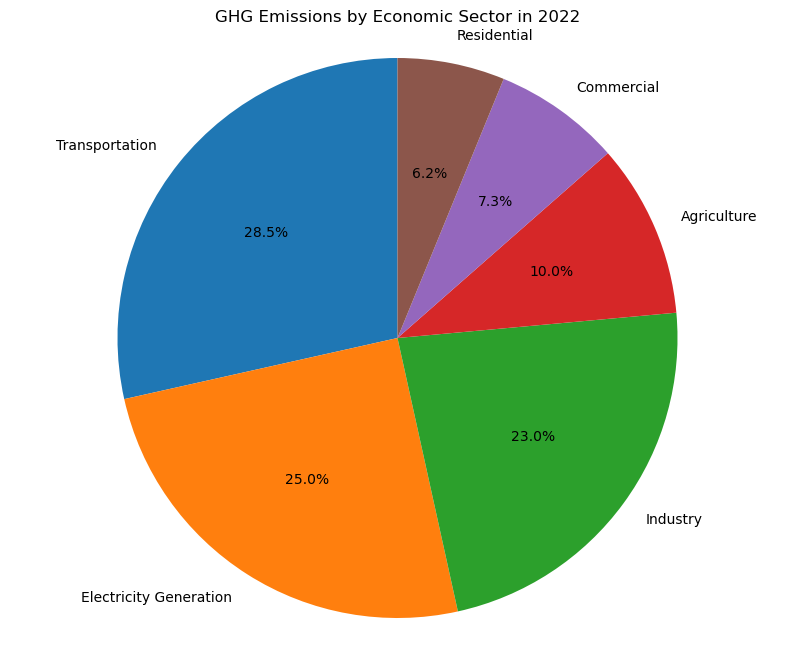

In [133]:
# Converts data columns to numeric
columns_to_convert = ['Transportation', 'Electricity Generation', 'Industry', 'Total']
emissions_by_econ_sector[columns_to_convert] = emissions_by_econ_sector[columns_to_convert].replace(',', '', regex=True).astype(float)

# Sets indes to Year
emissions_by_econ_sector = emissions_by_econ_sector.set_index('Year')

# Select the 2022 GHG data
data_2022 = emissions_by_econ_sector.loc['2022']
sectors = ['Transportation', 'Electricity Generation', 'Industry', 'Agriculture', 'Commercial', 'Residential']
values = data_2022[sectors]

# Creates pie chart 
plt.figure(figsize=(10, 8))
plt.pie(values, labels=sectors, autopct='%1.1f%%', startangle=90)
plt.title('GHG Emissions by Economic Sector in 2022')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

**GHG DATASET 2: Net Avoided Emissions and Avoided Share** \
_IEA projection of net avoided emissions from BEV and ICE using lifecycle GHG values (measured in millions of tons CO2e)\
and share of net avoided emissions (measured in percentages) for stated policies scenario (STEPS), announced pledges scenario (APS) \
and Net Zero Emissions (NZE) \
Documentation available at: https://www.iea.org/reports/global-ev-outlook-2024/outlook-for-emissions-reductions#abstract_

In [134]:
# Reads the CSV file, skipping the first 3 rows and using the 4th row as header
avoided_emissions_2035_proj = pd.read_csv("Resources/net-avoided-well-to-wheel-greenhouse-gas-emissions-from-electric-vehicle-deployment-2023-2035.csv",
                                          delimiter=';',
                                          skiprows=3,
                                          header=0)

avoided_emissions_2035_proj = avoided_emissions_2035_proj.rename(columns={'Unnamed: 0': 'Year'})


# Display the first 5 rows and data types
display(avoided_emissions_2035_proj.head(5))
display(avoided_emissions_2035_proj.dtypes)


,Year,STEPS,APS,NZE
0,2023,-130,-130,-120
1,2024,-180,-180,-200
2,2025,-240,-250,-310
3,2026,-320,-330,-440
4,2027,-420,-430,-600


Year      int64
STEPS     int64
APS       int64
NZE       int64
dtype: object

In [135]:
# Reads the CSV file, skipping the first 3 rows and using the 4th row as header
share_avoided_emissions_2035_proj = pd.read_csv("Resources/net-avoided-well-to-wheel-share-of-avoided-emissions-by-mode-2023-2035.csv",
                                          delimiter=';',
                                          skiprows=3,
                                          header=0)

share_avoided_emissions_2035_proj = share_avoided_emissions_2035_proj.rename(columns={'Unnamed: 0': 'Scnenario'})


# Display the first 5 rows and data types
print(share_avoided_emissions_2035_proj.head(5))


  Scnenario  LDVs  2/3Ws  Buses  Trucks
0     STEPS    81      4     10       6
1       APS    77      5     12       6
2       NZE    67     11     14       8


## Misc Datasets

**Misc DATASET 1: Coal vs EV Emissions Differences By Country** \
_dataset source and description_

In [136]:
# Reads the CSV file, skipping the first 3 rows and using the 4th row as header
coal_vs_EV_emissions = pd.read_csv("Resources/coal_power_vs_ev_emissions_with_difference.csv")

coal_vs_EV_emissions_by_country = coal_vs_EV_emissions.groupby(by="Country")
# Display the first 5 rows
coal_vs_EV_emissions_by_country.sum()

,Year,Coal Power Emissions (metric tons CO2),Number of EVs,Emissions Saved per EV (metric tons CO2/year),Total Emissions Saved by EVs (metric tons CO2),Difference (Coal Emissions - EV Savings) (metric tons CO2)
Country,,,,,,
China,6060,23700000000,15500000,13.8,71300000,23628700000
India,6060,7500000000,4500000,13.8,20700000,7479300000
United States,6060,3600000000,4900000,13.8,22540000,3577460000


## Dataset Use

**EXTRACTING DATAFRAMES FOR USE** \
The %run magic command may be added to other .ipynb files to execute the this notebook

In [137]:
# EXECUTED FROM NEW NOTEBOOK OPTION
    # Runs all the code in vehicle_fuel_emissions_data.ipynb and make the community_profile dataframe available in other notebook
    # To use this option, paste the "%run vehicle_fuel_emissions_data" command into a notebook that will execute this notebook

# %run vehicle_fuel_emissions_data.ipynb 